## Neural Network Algorithms

- [Importable source code (most up-to-date version)](https://github.com/sylvaticus/BetaML.jl/blob/master/src/Nn.jl) - [Julia Package](https://github.com/sylvaticus/BetaML.jl)
- [Demonstrative static notebook](https://github.com/sylvaticus/BetaML.jl/blob/master/notebooks/Nn.ipynb)
- [Demonstrative live notebook](https://mybinder.org/v2/gh/sylvaticus/BetaML.jl/master?filepath=notebooks%2FNn.ipynb) (temporary personal online computational environment on myBinder) - it can takes minutes to start with!
- Theory based on [MITx 6.86x - Machine Learning with Python: from Linear Models to Deep Learning](https://github.com/sylvaticus/MITx_6.86x) ([Unit 3](https://github.com/sylvaticus/MITx_6.86x/blob/master/Unit%2003%20-%20Neural%20networks/Unit%2003%20-%20Neural%20networks.md))
- New to Julia? [A concise Julia tutorial](https://github.com/sylvaticus/juliatutorial) - [Julia Quick Syntax Reference book](https://julia-book.com)


In [1]:
using Pkg
if ! haskey(Pkg.dependencies(), Base.UUID("f3b207a7-027a-5e70-b257-86293d7955fd")) 
    println("Adding StatsPlots..")
    Pkg.add("StatsPlots")
end
if ! haskey(Pkg.dependencies(), Base.UUID("31c24e10-a181-5473-b8eb-7969acd0382f")) 
    println("Adding Distributions..")
    Pkg.add("Distributions")
end
using BetaML.Nn, Random, DelimitedFiles, StatsPlots
import Distributions: Uniform
Random.seed!(123);

┌ Info: Precompiling BetaML [024491cd-cc6b-443e-8034-08ea7eb7db2b]
└ @ Base loading.jl:1260
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260


## Basic regression

In this example we show the simplest way to implement a regression model using neural networks with BetaML.Nn, in this case predicting 4 dimensions from a vector of 80 features using a single layer.

We first define and train the model without any optional parameters and using automatic differentiation, and then we  use the equivalent model with all parameter explicitly defined to their defualt value and providing manual derivatives of the activation functions (the most common of them are already provided in the Utils module).

The following cell may take a few seconds to start. That's the overheads from compiling the AD system. It happens only the first time AD is invoked in a Julia session and it doesn't depend from the size of the model.

In [2]:
# Set-up random data...
xtrain = rand(1000,80)
ytrain = vcat([[sum(x[1:10]) sum(x[21:50]) sum(x[51:70]) sum(x[71:80])] for x in eachrow(xtrain)]...)
xtest  = rand(100,80)
ytest  = vcat([[sum(x[1:10]) sum(x[21:50]) sum(x[51:70]) sum(x[71:80])] for x in eachrow(xtest)]...)
# Define the network...
l1     = DenseLayer(80,4)               # Default to identity as activation function and Xavier weigth initialisation
mynn   = buildNetwork([l1],squared_cost) # Build the NN using the squared cost (aka MSE) as error function
# Train the network...
res    = train!(mynn,xtrain,ytrain)     # Use opt_alg=SGD() to use Stochastic Gradient Descent instead
# Get predictions...
ŷtrain = predict(mynn,xtrain)           
ŷtest  = predict(mynn,xtest)
# Check goodness of fit...
MeanRelativeError = mean_relative_error(ŷtest,ytest)

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 31): 	 120.77271885306789


Training the Neural Network...  1%|▎                    |  ETA: 0:36:56

Training.. 	 avg ϵ on (Epoch 10 Batch 31): 	 10.15696537323699
Training.. 	 avg ϵ on (Epoch 20 Batch 31): 	 2.4120188512531344
Training.. 	 avg ϵ on (Epoch 30 Batch 31): 	 2.083489757966713
Training.. 	 avg ϵ on (Epoch 40 Batch 31): 	 1.7581163887175
Training.. 	 avg ϵ on (Epoch 50 Batch 31): 	 1.5860072536589909
Training.. 	 avg ϵ on (Epoch 60 Batch 31): 	 1.562473202286238


Training the Neural Network... 68%|██████████████▎      |  ETA: 0:00:11

Training.. 	 avg ϵ on (Epoch 70 Batch 31): 	 1.239250979946059
Training.. 	 avg ϵ on (Epoch 80 Batch 31): 	 1.2646372968510229
Training.. 	 avg ϵ on (Epoch 90 Batch 31): 	 1.4789137768709189


Training the Neural Network...100%|█████████████████████| Time: 0:00:24


Training.. 	 avg ϵ on (Epoch 100 Batch 31): 	 0.8562275391180909
Training of 100 epoch completed. Final epoch error: 1.0540667045736076.


0.059097106247321965

In [3]:
RelatreliveMeanError = mean_relative_error(ŷtest,ytest,normdim=false,normrec=false)

0.057725227454108706

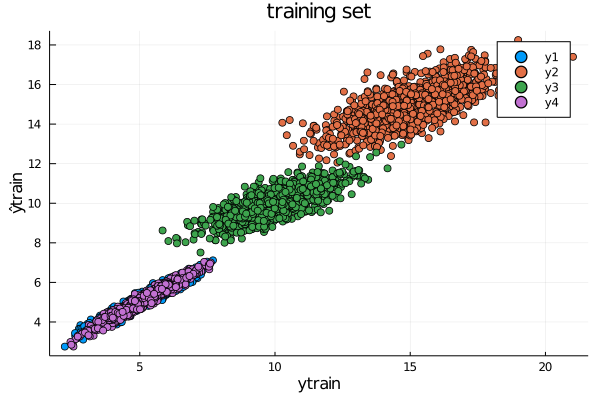

In [4]:
scatter(ytrain,ŷtrain, title="training set", xlabel="ytrain",ylabel="ŷtrain")

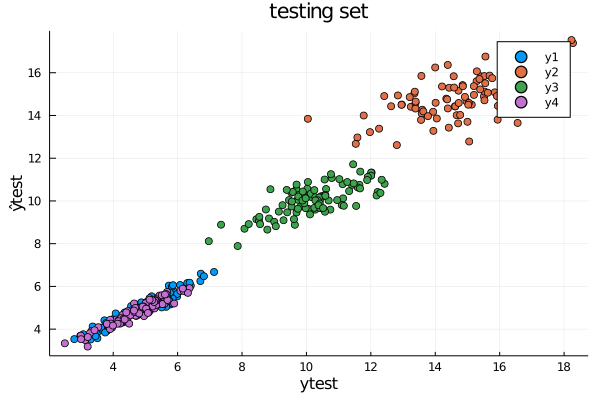

In [5]:
scatter(ytest,ŷtest, title="testing set", xlabel="ytest",ylabel="ŷtest")

The above model is equivalent to:

In [6]:
# Define the neural network with all the default values set explicitly and providing the derivatives...
wInit  = sqrt(6)/sqrt(80+4)
l1     = DenseLayer(80,4;w=rand(Uniform(-wInit,wInit),4,80),wb=rand(Uniform(-wInit,wInit),4),f=identity,df=didentity)
mynn   = buildNetwork([l1],squared_cost,dcf=dSquaredCost,name="Neural Network")

NN(Layer[DenseLayer([0.26063734123344606 -0.05852368858891702 … 0.003945332348232855 -0.2474632390838622; -0.19123756053896224 -0.15403013938692292 … 0.04570193938999545 0.24218431632350956; -0.18908380093170254 0.22456301102138077 … 0.07566005481011734 -0.11852754063080967; 0.1671459482376496 -0.010869818088508454 … 0.20698618179231149 0.05347078054514215], [0.09919218798648927, -0.23745961079200814, -0.017028713772059945, 0.006803675040788937], identity, BetaML.Utils.didentity)], BetaML.Utils.squared_cost, BetaML.Utils.dSquaredCost, false, "Neural Network")

In [7]:
# Train the network with all the default values set explicitly...
train!(mynn,xtrain,ytrain; epochs=100, batch_size=min(size(xtrain,1),32), sequential=false, verbosity=STD, cb=Nn.fitting_info, opt_alg=ADAM(η=t -> 0.001, λ=1.0, β₁=0.9, β₂=0.999, ϵ=1e-8))

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 31): 	 153.31477642722902
Training.. 	 avg ϵ on (Epoch 10 Batch 31): 	 15.895897324838243
Training.. 	 avg ϵ on (Epoch 20 Batch 31): 	 3.5379755235163532
Training.. 	 avg ϵ on (Epoch 30 Batch 31): 	 2.2537161258081886
Training.. 	 avg ϵ on (Epoch 40 Batch 31): 	 1.7014359988172796
Training.. 	 avg ϵ on (Epoch 50 Batch 31): 	 1.7041743606884745


Training the Neural Network... 50%|██████████▌          |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 31): 	 1.5266125085976923
Training.. 	 avg ϵ on (Epoch 70 Batch 31): 	 1.6208440069075623
Training.. 	 avg ϵ on (Epoch 80 Batch 31): 	 1.5600210745368608
Training.. 	 avg ϵ on (Epoch 90 Batch 31): 	 1.0042706297160253


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 31): 	 0.8290508165279434
Training of 100 epoch completed. Final epoch error: 1.10906192619531.


(epochs = 100, ϵ_epochs = [183.0164073904489, 143.84995301967308, 112.58079129980612, 88.36339575577664, 69.38652504567847, 54.5644330142362, 42.866757543172895, 33.62746584068698, 26.325314834543224, 20.592120353931058  …  1.24272417448067, 1.227549434838863, 1.2127704601797225, 1.1976664956420544, 1.1826263036561666, 1.167707482683012, 1.1529025518779452, 1.1384249924496517, 1.1241602291167192, 1.10906192619531], θ_epochs = Any[])

## Non-linear regression

In [8]:
# Set Random data
xtrain = rand(30000,3)
ytrain = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtrain))]
xtest  = rand(3000,3)
ytest  = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtest))]

3000-element Array{Float64,1}:
 1.6384557892938085
 1.689711228173545
 1.3920985870661722
 1.3972347298301795
 1.5023970167982323
 1.6119810821879128
 1.2729381260167467
 1.4763912851164545
 1.4873099513497894
 1.5155037222022252
 1.6493898212100653
 1.5771847140529656
 1.2856449013391535
 ⋮
 1.2713542587382765
 1.4252999388083774
 1.6561167526758716
 1.4995466807189566
 1.8679811664905337
 1.3076072797042158
 1.776136369768295
 1.5136512997973364
 1.3614485188008307
 1.421569389586446
 1.757060456518577
 1.8823508076044682

In [15]:
# Define the network
l1   = DenseLayer(3,2,)
l2   = DenseLayer(2,2,f=relu)
l3   = DenseLayer(2,1)
mynn = buildNetwork([l1,l2,l3],squared_cost,name="Feed-forward Neural Network Model 1")

NN(Layer[DenseLayer([-0.21143397381282625 0.2967384764194543 0.14697895522592308; 0.23138191956661225 -0.11375214923845611 -0.016450286753592502], [0.6808279324248334, -0.6760131002368217], identity, nothing), DenseLayer([-0.3744943058970427 -0.28597243263423544; 1.039370970415857 -0.013197389519939318], [0.3366289281122341, 0.800123977553334], BetaML.Utils.relu, nothing), DenseLayer([-1.1131654996631353 1.3575856358831868], [0.91422828675584], identity, nothing)], BetaML.Utils.squared_cost, nothing, false, "Feed-forward Neural Network Model 1")

In [16]:
train!(mynn,xtrain,ytrain,epochs=10,batch_size=32,verbosity=STD,opt_alg=ADAM())

***
*** Training Feed-forward Neural Network Model 1 for 10 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 937): 	 0.006576777792483297
Training.. 	 avg ϵ on (Epoch 2 Batch 937): 	 0.002599863012347822


Training the Neural Network... 20%|████▎                |  ETA: 0:00:06

Training.. 	 avg ϵ on (Epoch 3 Batch 937): 	 0.0032794495297890983
Training.. 	 avg ϵ on (Epoch 4 Batch 937): 	 0.004480278277927291


Training the Neural Network... 40%|████████▍            |  ETA: 0:00:05

Training.. 	 avg ϵ on (Epoch 5 Batch 937): 	 0.0036199681153532438


Training the Neural Network... 60%|████████████▋        |  ETA: 0:00:03

Training.. 	 avg ϵ on (Epoch 6 Batch 937): 	 0.0031151854599164534
Training.. 	 avg ϵ on (Epoch 7 Batch 937): 	 0.004181932732739725


Training the Neural Network... 80%|████████████████▊    |  ETA: 0:00:02

Training.. 	 avg ϵ on (Epoch 8 Batch 937): 	 0.003671585665010564
Training.. 	 avg ϵ on (Epoch 9 Batch 937): 	 0.004303227744052723
Training.. 	 avg ϵ on (Epoch 10 Batch 937): 	 0.00439425663113741


Training the Neural Network...100%|█████████████████████| Time: 0:00:07


Training of 10 epoch completed. Final epoch error: 0.0038033657467744656.


(epochs = 10, ϵ_epochs = [1.0502635950315706, 0.008499852353762022, 0.0038377235673932564, 0.00380235131869764, 0.0038183822052879407, 0.0038614589362361974, 0.0038133684672304, 0.0038163839766645266, 0.0038056496460312506, 0.003835758844708569, 0.0038033657467744656], θ_epochs = Any[])

In [17]:
avgLossTraining = loss(mynn,xtrain,ytrain)

0.0038033657467744656

In [18]:
avgLossTest = loss(mynn,xtest,ytest)

0.0037910918460103073

In [19]:
ŷtest  = predict(mynn,xtest)
meanrelError = mean_relative_error(ŷtest,ytest)

0.05117549309899521

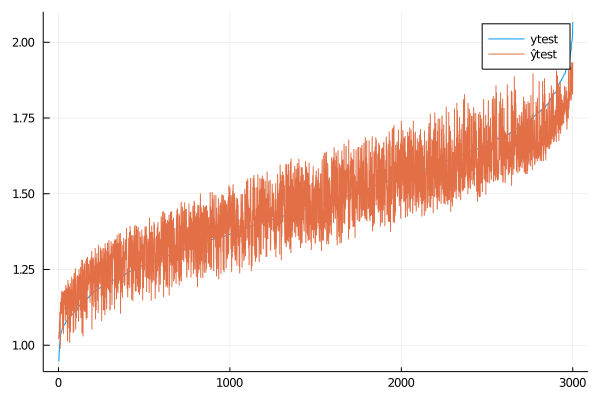

In [20]:
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedŶtest = ŷtest[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedŶtest],label=["ytest" "ŷtest"])

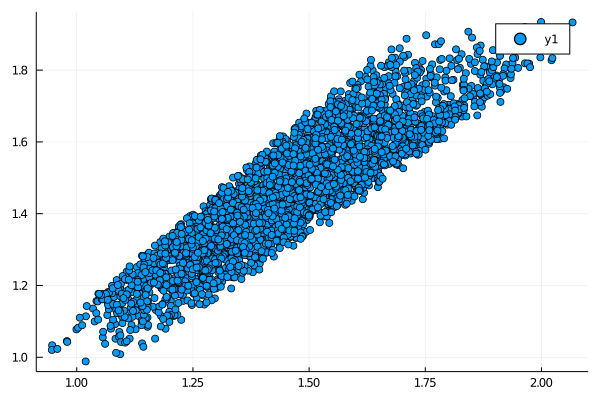

In [21]:
scatter(ytest,ŷtest)

## Regression: scaling and algorithms
Here we see how to use variable scaling and set different optimisation algorithms

In [22]:
xtrain = pi*rand(1000)
ytrain = sin.(xtrain) + 0.5 * cos.(xtrain)
xtest = pi*rand(200)
ytest = sin.(xtest) + 0.5 * cos.(xtest)

200-element Array{Float64,1}:
  0.9965217006613811
  1.0855144737036007
  0.948094765411835
  1.0950342668778055
  1.0272764149278015
  0.8645334491300255
  0.9924648162050256
 -0.1384986692032848
  0.7493212478719813
  0.5071941685919171
  1.0486046161188123
 -0.06166544585222994
  0.6411493235500969
  ⋮
 -0.16866493304165403
 -0.001403392191371644
  1.0461561711517025
  1.067966216296048
  0.37760103061547823
  0.06111127074437095
  0.9019873307120004
  0.8383250022921153
  0.20276796489683818
  0.6259584850570844
  0.6626917603204824
  0.730594468609324

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 1.5885115276249959e115
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.11954272218152462
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.020917560708347088
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.023771020515608827


Training the Neural Network... 35%|███████▍             |  ETA: 0:00:02

Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.11126824758353318
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.10784951831299477
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.07968373536068152
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 0.17666001108448687
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.11366013400781218
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.04543097795147915


Training the Neural Network...100%|█████████████████████| Time: 0:00:02


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.12264582320160383
Training of 100 epoch completed. Final epoch error: 0.1121260913629004.


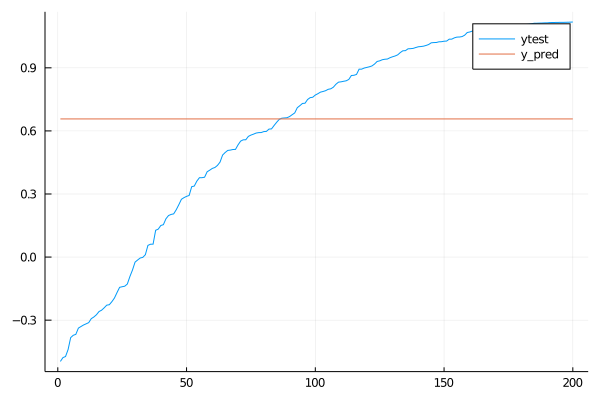

In [23]:
# No scaling... ..not very good result!!
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squared_cost,dcf=dSquaredCost)
train!(myfnn,xtrain,ytrain,epochs=100,batch_size=8,opt_alg=SGD())
y_pred = predict(myfnn,xtest)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 0.0016518352215558038
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.00012397826848522885
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.00014456460209890225
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.00016408739133407912
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 2.432929577995045e-5


Training the Neural Network... 56%|███████████▊         |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.00013418532804774003
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 5.2135515067011247e-5
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 4.964164397723728e-6
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 3.920326820819556e-5
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.00012949664665344655


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.0001472554486432034
Training of 100 epoch completed. Final epoch error: 5.448074983126989e-5.


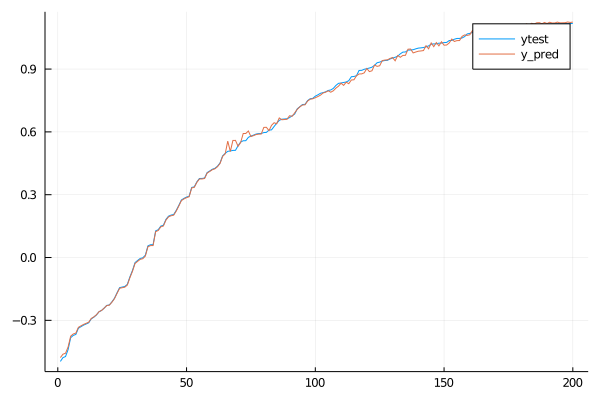

In [24]:
# Scaling of the X only...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squared_cost,dcf=dSquaredCost)
xScaleFactors= get_scalefactors(xtrain)
train!(myfnn,scale(xtrain),ytrain,epochs=100,batch_size=8,opt_alg=SGD())
y_pred = predict(myfnn,scale(xtest,xScaleFactors))
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 1.1360851710480462
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 4.231222951397158e-5
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 6.093862747266726e-5
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.0002705884367033681
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.00014521561547458815
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.00010224964972274367


Training the Neural Network... 55%|███████████▌         |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 9.657977874578757e-5
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 8.320742111067106e-5
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.00014674543663357483
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.0001191625434500846


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 9.376262233822021e-5
Training of 100 epoch completed. Final epoch error: 0.00013131125492202753.


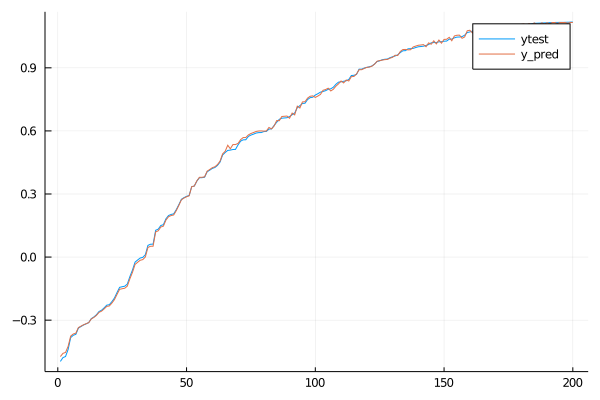

In [25]:
# Scaling of the X and of the Y...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squared_cost,dcf=dSquaredCost)
xScaleFactors = get_scalefactors(xtrain)
yScaleFactors = get_scalefactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batch_size=8,opt_alg=SGD())
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 1.6907727904754732
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.3759904612130721
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.1488384325737232
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.010868006304760433
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.01103000912947149


Training the Neural Network... 42%|████████▉            |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.0034583191633173155
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.0005011381005682341
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 0.00034709387287507683
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.0007386416613870697


Training the Neural Network... 84%|█████████████████▋   |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.0001144400065773747


Training the Neural Network...100%|█████████████████████| Time: 0:00:02


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.00019440426443178896
Training of 100 epoch completed. Final epoch error: 0.00015798977793778077.


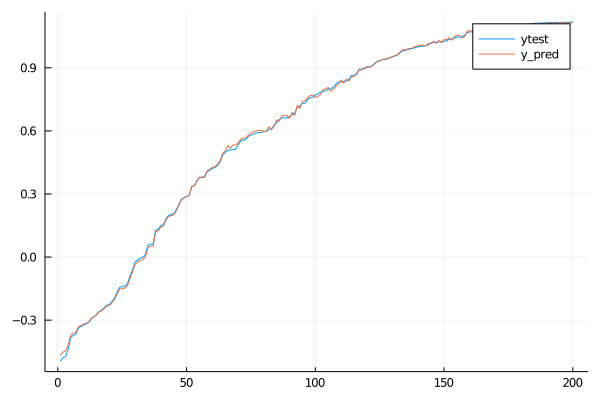

In [26]:
# Scaling of the X and of the Y and using ADAM..
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squared_cost,dcf=dSquaredCost)
xScaleFactors = get_scalefactors(xtrain)
yScaleFactors = get_scalefactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batch_size=8,opt_alg=ADAM())
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

## Classification

In [27]:
# Load the data
iris     = readdlm(joinpath(dirname(Base.find_package("BetaML")),"..","test","data","iris.csv"),',',skipstart=1)
iris     = iris[shuffle(axes(iris, 1)), :] # Shuffle the records, as they aren't by default
x        = convert(Array{Float64,2}, iris[:,1:4])
y        = map(x->Dict("setosa" => 1, "versicolor" => 2, "virginica" =>3)[x],iris[:, 5]) # Convert the target column to numbers
y_oh     = onehotencoder(y) # Convert to One-hot representation (e.g. 2 => [0 1 0], 3 => [0 0 1])

150×3 Array{Int64,2}:
 0  0  1
 0  0  1
 0  1  0
 1  0  0
 0  1  0
 0  1  0
 1  0  0
 1  0  0
 0  0  1
 1  0  0
 1  0  0
 1  0  0
 0  1  0
 ⋮     
 0  1  0
 0  0  1
 0  0  1
 1  0  0
 0  0  1
 1  0  0
 1  0  0
 0  0  1
 0  0  1
 1  0  0
 1  0  0
 0  0  1

In [34]:
# Split the data in training/testing sets
((xtrain,xtest),(ytrain,ytest),(ytrain_oh,ytest_oh)) = Utils.partition([x,y,y_oh],[0.8,0.2],shuffle=false)
(ytrain,ytest)  = dropdims.([ytrain,ytest],dims=2)
(ntrain, ntest) = size.([xtrain,xtest],1)

2-element Array{Int64,1}:
 120
  30

In [31]:
# Define the Artificial Neural Network model
l1   = DenseLayer(4,10,f=relu) # Activation function is ReLU
l2   = DenseLayer(10,3)        # Activation function is identity by default
l3   = VectorFunctionLayer(3,3,f=softmax) # Add a (parameterless) layer whose activation function (softMax in this case) is defined to all its nodes at once
mynn = buildNetwork([l1,l2,l3],squared_cost,name="Multinomial logistic regression Model Sepal") # Build the NN and use the squared cost (aka MSE) as error function

NN(Layer[DenseLayer([0.517533313263514 -0.17812749114319099 -0.6319122268218479 -0.34478824828953725; 0.5842244867385733 -0.03441244452668213 0.5846537210342748 -0.17571212486013899; … ; -0.41544229347247075 -0.36202191948277157 0.5499075835826717 0.47095628943237733; 0.440278589724759 -0.08399794816086226 0.547293105776941 -0.30897631521443114], [0.6319300457481114, -0.07715772047139868, 0.24181518325770035, -0.5090091159107685, 0.5204560146237986, -0.14893447078781874, -0.24346953942225785, -0.638408646159288, -0.5108815898153153, 0.14132581359621843], BetaML.Utils.relu, nothing), DenseLayer([-0.1841859089488327 0.4179977409559772 … -0.6005094336622342 -0.2638436700841577; 0.46514405743239884 0.15407852740149874 … 0.5843933016448861 0.5273788439019822; 0.08123521702025349 -0.5639269214346752 … -0.4238541219786225 0.25992248904675985], [0.6783337253857398, -0.273777595229938, -0.4282491296646571], identity, nothing), VectorFunctionLayer(3, 3, BetaML.Utils.softmax, nothing)], BetaML.Ut

In [32]:
# Training it (default to ADAM)
res = train!(mynn,scale(xtrain),ytrain_oh,epochs=100,batch_size=6,opt_alg=SGD()) # Use opt_alg=ADAM (Moment-based stochastic gradient descent) by default

***
*** Training Multinomial logistic regression Model Sepal for 100 epochs with algorithm SGD.


Training the Neural Network...  1%|▎                    |  ETA: 0:05:56

Training.. 	 avg ϵ on (Epoch 1 Batch 20): 	 0.09417225582749623
Training.. 	 avg ϵ on (Epoch 10 Batch 20): 	 0.00829920540781198
Training.. 	 avg ϵ on (Epoch 20 Batch 20): 	 0.05831464168705395
Training.. 	 avg ϵ on (Epoch 30 Batch 20): 	 0.06734094670073854
Training.. 	 avg ϵ on (Epoch 40 Batch 20): 	 0.06802098788580498
Training.. 	 avg ϵ on (Epoch 50 Batch 20): 	 0.08993765238687275
Training.. 	 avg ϵ on (Epoch 60 Batch 20): 	 0.00013451144057041926
Training.. 	 avg ϵ on (Epoch 70 Batch 20): 	 0.002834785176557308
Training.. 	 avg ϵ on (Epoch 80 Batch 20): 	 0.004694435727197253
Training.. 	 avg ϵ on (Epoch 90 Batch 20): 	 0.0010755712731218556


Training the Neural Network...100%|█████████████████████| Time: 0:00:04


Training.. 	 avg ϵ on (Epoch 100 Batch 20): 	 0.0005490677721204819
Training of 100 epoch completed. Final epoch error: 0.016742285161095816.


(epochs = 100, ϵ_epochs = [0.5220251919824811, 0.10285759146676758, 0.07901545778336552, 0.04868235535125099, 0.03649333659263524, 0.03236729960471186, 0.029271621883901408, 0.028552242234700112, 0.02643297929414343, 0.02449722547523867  …  0.016856766177612344, 0.016842885282999997, 0.016829222174011046, 0.016816073667803633, 0.01680325681067659, 0.01679088302276316, 0.0167783426989992, 0.016766141160575992, 0.016753981353864356, 0.016742285161095816], θ_epochs = Any[])

In [35]:
# Test it
ŷtrain        = predict(mynn,scale(xtrain))   # Note the scaling function
ŷtest         = predict(mynn,scale(xtest))
trainAccuracy = accuracy(ŷtrain,ytrain,tol=1) # 0.983
testAccuracy  = accuracy(ŷtest,ytest,tol=1)   # 1.0

0.9

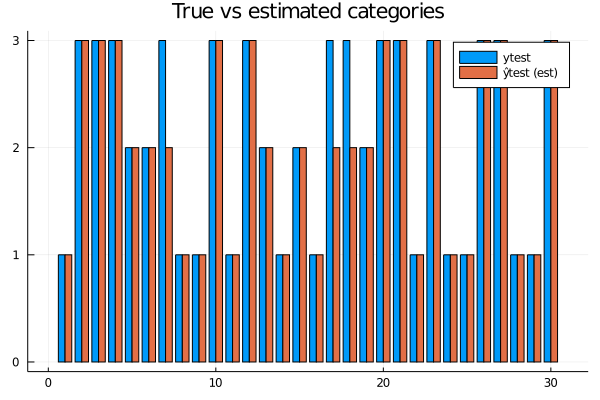

In [36]:
# Visualise results
testSize = size(ŷtest,1)
ŷtestChosen =  [argmax(ŷtest[i,:]) for i in 1:testSize]
groupedbar([ytest ŷtestChosen], label=["ytest" "ŷtest (est)"], title="True vs estimated categories") # All records correctly labelled !

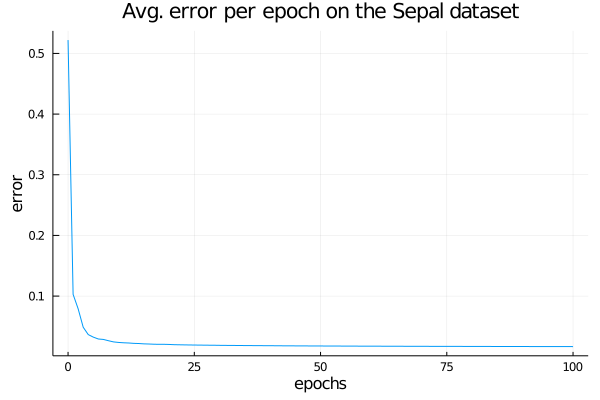

In [37]:
plot(0:res.epochs,res.ϵ_epochs, ylabel="error",xlabel="epochs",legend=nothing,title="Avg. error per epoch on the Sepal dataset")